We first import E2G class:

In [1]:
import pandas as pd
from encode_e2g import E2G

Choose ENCODE-E2G or ENCODE-E2G_Extended:

In [2]:
# True for ENCODE-E2G_Extended / False for  ENCODE-E2G
extented = False

Read the TSS file:

In [3]:
tss = pd.read_csv('./tss/RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed', names = ['chr', 'start', 'end', 'gene', 'len', 'strand'], delimiter = '\t')
tss

chr     start       end          gene  len strand
0      chr1     11623     12123       DDX11L1    0      +
1      chr1     29120     29620        WASH7P    0      -
2      chr1     35831     36331       FAM138A    0      -
3      chr1     35831     36331       FAM138F    0      -
4      chr1     68840     69340         OR4F5    0      +
...     ...       ...       ...           ...  ...    ...
24456  chrY  22298626  22299126         TTTY5    0      -
24457  chrY  22308608  22309108       RBMY2FP    0      +
24458  chrY  22316427  22316927  LOC100652931    0      +
24459  chrY  23198842  23199342          DAZ1    0      -
24460  chrY  23219206  23219706          DAZ2    0      +

[24461 rows x 6 columns]

Read the CRISPRi E-G dataset:

In [4]:
if extented:
    dataset = pd.read_csv('./data/crispri/EPCrisprBenchmark_ensemble_data_GRCh38.K562_AllFeatures_NAfilled.FullModel.tsv', delimiter = '\t')
else:
    dataset = pd.read_csv('./data/crispri/EPCrisprBenchmark_ensemble_data_GRCh38.K562_ENCDO000AAD_ENCFF325RTP_DNaseOnly_features_NAfilled.tsv', delimiter = '\t')

dataset

dataset  chrom  chromStart   chromEnd  \
0      FlowFISH_K562   chr1     3774714    3775214   
1      FlowFISH_K562   chr1     3774714    3775214   
2      FlowFISH_K562   chr1     3774714    3775214   
3      FlowFISH_K562  chr10   125816658  125816735   
4      FlowFISH_K562  chr11     3261795    3262295   
...              ...    ...         ...        ...   
10407         TAPseq   chr8   125528738  125529164   
10408         TAPseq   chr8   125544507  125545059   
10409         TAPseq   chr8   125664274  125664878   
10410         TAPseq   chr8   125694248  125694539   
10411         TAPseq   chr8   125971910  125972281   

                                    name  EffectSize chrTSS     startTSS  \
0          CEP104|chr1:3691278-3691778:*   -0.293432   chr1    3857213.0   
1          LRRC47|chr1:3691278-3691778:*   -0.331178   chr1    3796503.0   
2           SMIM1|chr1:3691278-3691778:*   -0.472019   chr1    3772761.0   
3       UROS|chr10:127505227-127505304:*   -0.850000  chr10  125823284.0   
4           HBE1|chr11:3283025-3283525:*    0.029242  chr11    5505651.0   
...                                  ...         ...    ...          ...   
10407  NSMCE2|chr8:125528738-125529164:.    0.018247   chr8  125091679.0   
10408  NSMCE2|chr8:125544507-125545059:.    0.085396   chr8  125091679.0   
10409  NSMCE2|chr8:125664274-125664878:.   -0.021983   chr8  125091679.0   
10410  NSMCE2|chr8:125694248-125694539:.    0.020683   chr8  125091679.0   
10411  NSMCE2|chr8:125971910-125972281:.    0.048163   chr8  125091679.0   

            endTSS measuredGeneSymbol  ...  normalizedDNase_prom  \
0        3857214.0             CEP104  ...              0.938883   
1        3796504.0             LRRC47  ...              0.822184   
2        3772762.0              SMIM1  ...              0.808247   
3      125823285.0               UROS  ...              0.675480   
4        5505652.0               HBE1  ...              0.000000   
...            ...                ...  ...                   ...   
10407  125091680.0             NSMCE2  ...              0.749549   
10408  125091680.0             NSMCE2  ...              0.000000   
10409  125091680.0             NSMCE2  ...              0.749549   
10410  125091680.0             NSMCE2  ...              0.000000   
10411  125091680.0             NSMCE2  ...              0.000000   

       numNearbyEnhancers  sumNearbyEnhancers  ubiquitousExpressedGene  \
0                       1            6.638288                        1   
1                       1            6.638288                        1   
2                       1            6.638288                        0   
3                       1            1.928554                        1   
4                       0            0.000000                        0   
...                   ...                 ...                      ...   
10407                   1            2.080550                        1   
10408                   0            0.000000                        0   
10409                   0            0.000000                        1   
10410                   0            0.000000                        0   
10411                   0            0.000000                        0   

      numCandidateEnhGene 3DContactAvgHicTrack2 3DContactAvgHicTrack2_squared  \
0                       0              0.002134                  4.553956e-06   
1                       0              0.010105                  1.021110e-04   
2                       0              0.048065                  2.310244e-03   
3                       0              0.046451                  2.157695e-03   
4                       0              0.000000                  0.000000e+00   
...                   ...                   ...                           ...   
10407                   0              0.000927                  8.593290e-07   
10408                   0              0.000000                  0.000000e+00   
10409           

Read the feature table:

In [5]:
if extented:
    feature_table = pd.read_csv('./data/feature_table/model_ablation_encode_e2g_extended.tsv', delimiter = '\t')
else:
    feature_table = pd.read_csv('./data/feature_table/model_ablation_encode_e2g.tsv', delimiter = '\t')
    
feature_table

features           category  ENCODE-E2G  \
0                              numTSSEnhGene            generic           1   
1                              distanceToTSS            generic           1   
2                        normalizedDNase_enh  enhancer activity           1   
3                       normalizedDNase_prom  promoter activity           1   
4                         numNearbyEnhancers            generic           1   
5                         sumNearbyEnhancers            generic           1   
6                    ubiquitousExpressedGene     promoter class           1   
7                        numCandidateEnhGene            generic           1   
8                      3DContactAvgHicTrack2               Hi-C           1   
9              3DContactAvgHicTrack2_squared               Hi-C           1   
10  activityEnhDNaseOnlyAvgHicTrack2_squared  enhancer activity           1   
11         activityPromDNaseOnlyAvgHicTrack2  promoter activity           1   
12             ABCScoreDNaseOnlyAvgHicTrack2                ABC           1   

    ENCODE-E2G without distance  ENCODE-E2G without contact  \
0                             0                           1   
1                             0                           1   
2                             1                           1   
3                             1                           1   
4                             1                           1   
5                             1                           1   
6                             1                           1   
7                             1                           1   
8                             1                           0   
9                             1                           0   
10                            1                           1   
11                            1                           1   
12                            1                           0   

    ENCODE-E2G without distance and contact  ENCODE-E2G without ABC  \
0                                         0                       1   
1                                         0                       1   
2                                         1                       1   
3                                         1                       1   
4                                         1                       1   
5                                         1                       1   
6                                         1                       1   
7                                         1                       1   
8                                         0                       1   
9                                         0                       1   
10                                        1                       1   
11                                        1                       1   
12                                        0                       0   

    ENCODE-E2G without nearby enhancers  ENCODE-E2G without enhancer activity  \
0                                     1                                     1   
1                                     1                                     1   
2                                     1                                     0   
3                                     1                                     1   
4                                     0                                     1   
5                                     0                                     1   
6                                     1                                     1   
7                                     0                                     1   
8                                     1                                     1   
9                                     1                                     1   
10                                    1                                     0   
11                                    1                                     1  

Import ENCODE-E2G class:

In [6]:
e2g = E2G(dataset, tss, feature_table, extended = extented)

Run dataset preprocesseing:

In [7]:
e2g.dataset_preprocessing()
e2g.df_dataset

dataset  chrom  chromStart   chromEnd  \
0      FlowFISH_K562   chr1     3774714    3775214   
1      FlowFISH_K562   chr1     3774714    3775214   
2      FlowFISH_K562   chr1     3774714    3775214   
3      FlowFISH_K562  chr10   125816658  125816735   
4      FlowFISH_K562  chr11     3261795    3262295   
...              ...    ...         ...        ...   
10370         TAPseq   chr8   125528738  125529164   
10371         TAPseq   chr8   125544507  125545059   
10372         TAPseq   chr8   125664274  125664878   
10373         TAPseq   chr8   125694248  125694539   
10374         TAPseq   chr8   125971910  125972281   

                                    name  EffectSize chrTSS     startTSS  \
0          CEP104|chr1:3691278-3691778:*   -0.293432   chr1    3857213.0   
1          LRRC47|chr1:3691278-3691778:*   -0.331178   chr1    3796503.0   
2           SMIM1|chr1:3691278-3691778:*   -0.472019   chr1    3772761.0   
3       UROS|chr10:127505227-127505304:*   -0.850000  chr10  125823284.0   
4           HBE1|chr11:3283025-3283525:*    0.029242  chr11    5505651.0   
...                                  ...         ...    ...          ...   
10370  NSMCE2|chr8:125528738-125529164:.    0.018247   chr8  125091679.0   
10371  NSMCE2|chr8:125544507-125545059:.    0.085396   chr8  125091679.0   
10372  NSMCE2|chr8:125664274-125664878:.   -0.021983   chr8  125091679.0   
10373  NSMCE2|chr8:125694248-125694539:.    0.020683   chr8  125091679.0   
10374  NSMCE2|chr8:125971910-125972281:.    0.048163   chr8  125091679.0   

            endTSS measuredGeneSymbol  ...  normalizedDNase_prom  \
0        3857214.0             CEP104  ...              0.938883   
1        3796504.0             LRRC47  ...              0.822184   
2        3772762.0              SMIM1  ...              0.808247   
3      125823285.0               UROS  ...              0.675480   
4        5505652.0               HBE1  ...              0.000000   
...            ...                ...  ...                   ...   
10370  125091680.0             NSMCE2  ...              0.749549   
10371  125091680.0             NSMCE2  ...              0.000000   
10372  125091680.0             NSMCE2  ...              0.749549   
10373  125091680.0             NSMCE2  ...              0.000000   
10374  125091680.0             NSMCE2  ...              0.000000   

       numNearbyEnhancers  sumNearbyEnhancers  ubiquitousExpressedGene  \
0                       1            6.638288                        1   
1                       1            6.638288                        1   
2                       1            6.638288                        0   
3                       1            1.928554                        1   
4                       0            0.000000                        0   
...                   ...                 ...                      ...   
10370                   1            2.080550                        1   
10371                   0            0.000000                        0   
10372                   0            0.000000                        1   
10373                   0            0.000000                        0   
10374                   0            0.000000                        0   

      numCandidateEnhGene 3DContactAvgHicTrack2  \
0                       0              0.002134   
1                       0              0.010105   
2                       0              0.048065   
3                       0              0.046451   
4                       0              0.000000   
...                   ...                   ...   
10370                   0              0.000927   
10371                   0              0.000000   
10372                   0              0.001355   
10373                   0              0.000000   
10374                   0              0.000000   

       3DContactAvgHicTrack2_squared  \
0                       4.553956e-06   
1                       1.021110e-04   
2           

Train the models and append the E-G prediction scores in heldout chromosomes to the dataset for all the models:

In [8]:
e2g.train_and_predict()
e2g.df_dataset

Number of models: 9
Model name: ENCODE-E2G | Number of features: 13
Number of E-G pairs in test chromosome chr1 is 826
Number of E-G pairs in test chromosome chr10 is 110
Number of E-G pairs in test chromosome chr11 is 1402
Number of E-G pairs in test chromosome chr12 is 595
Number of E-G pairs in test chromosome chr13 is 11
Number of E-G pairs in test chromosome chr14 is 139
Number of E-G pairs in test chromosome chr15 is 60
Number of E-G pairs in test chromosome chr16 is 172
Number of E-G pairs in test chromosome chr17 is 323
Number of E-G pairs in test chromosome chr18 is 69
Number of E-G pairs in test chromosome chr19 is 2260
Number of E-G pairs in test chromosome chr2 is 307
Number of E-G pairs in test chromosome chr20 is 119
Number of E-G pairs in test chromosome chr21 is 45
Number of E-G pairs in test chromosome chr22 is 99
Number of E-G pairs in test chromosome chr3 is 805
Number of E-G pairs in test chromosome chr4 is 109
Number of E-G pairs in test chromosome chr5 is 255
Numb

dataset  chrom  chromStart   chromEnd  \
0      FlowFISH_K562   chr1     3774714    3775214   
1      FlowFISH_K562   chr1     3774714    3775214   
2      FlowFISH_K562   chr1     3774714    3775214   
3      FlowFISH_K562  chr10   125816658  125816735   
4      FlowFISH_K562  chr11     3261795    3262295   
...              ...    ...         ...        ...   
10370         TAPseq   chr8   125528738  125529164   
10371         TAPseq   chr8   125544507  125545059   
10372         TAPseq   chr8   125664274  125664878   
10373         TAPseq   chr8   125694248  125694539   
10374         TAPseq   chr8   125971910  125972281   

                                    name  EffectSize chrTSS     startTSS  \
0          CEP104|chr1:3691278-3691778:*   -0.293432   chr1    3857213.0   
1          LRRC47|chr1:3691278-3691778:*   -0.331178   chr1    3796503.0   
2           SMIM1|chr1:3691278-3691778:*   -0.472019   chr1    3772761.0   
3       UROS|chr10:127505227-127505304:*   -0.850000  chr10  125823284.0   
4           HBE1|chr11:3283025-3283525:*    0.029242  chr11    5505651.0   
...                                  ...         ...    ...          ...   
10370  NSMCE2|chr8:125528738-125529164:.    0.018247   chr8  125091679.0   
10371  NSMCE2|chr8:125544507-125545059:.    0.085396   chr8  125091679.0   
10372  NSMCE2|chr8:125664274-125664878:.   -0.021983   chr8  125091679.0   
10373  NSMCE2|chr8:125694248-125694539:.    0.020683   chr8  125091679.0   
10374  NSMCE2|chr8:125971910-125972281:.    0.048163   chr8  125091679.0   

            endTSS measuredGeneSymbol  ...  ABCScoreDNaseOnlyAvgHicTrack2  \
0        3857214.0             CEP104  ...                       0.028925   
1        3796504.0             LRRC47  ...                       0.117806   
2        3772762.0              SMIM1  ...                       0.371951   
3      125823285.0               UROS  ...                       0.367912   
4        5505652.0               HBE1  ...                       0.000000   
...            ...                ...  ...                            ...   
10370  125091680.0             NSMCE2  ...                       0.001036   
10371  125091680.0             NSMCE2  ...                       0.000000   
10372  125091680.0             NSMCE2  ...                       0.004168   
10373  125091680.0             NSMCE2  ...                       0.000000   
10374  125091680.0             NSMCE2  ...                       0.000000   

       ENCODE-E2G.Score  ENCODE-E2G without distance.Score  \
0              0.103934                           0.085524   
1              0.741575                           0.773417   
2              0.991165                           0.996050   
3              0.912383                           0.982647   
4              0.005323                           0.032860   
...                 ...                                ...   
10370          0.002726                           0.004632   
10371          0.015055                           0.034494   
10372          0.000505                           0.001190   
10373          0.011956                           0.034494   
10374          0.008795                           0.034494   

       ENCODE-E2G without contact.Score  \
0                              0.066799   
1                              0.358567   
2                              0.947226   
3                              0.490568   
4                              0.002394   
...                                 ...   
10370                          0.001285   
10371                          0.010389   
10372                          0.000436   
10373                          0.007729   
10374                          0.005213   

      ENCODE-E2G without distance and contact.Score  \
0                                          0.041932   
1                                          0.054959   
2                                          0.218390   
3                                          0

Plot Precision-Recall curves:

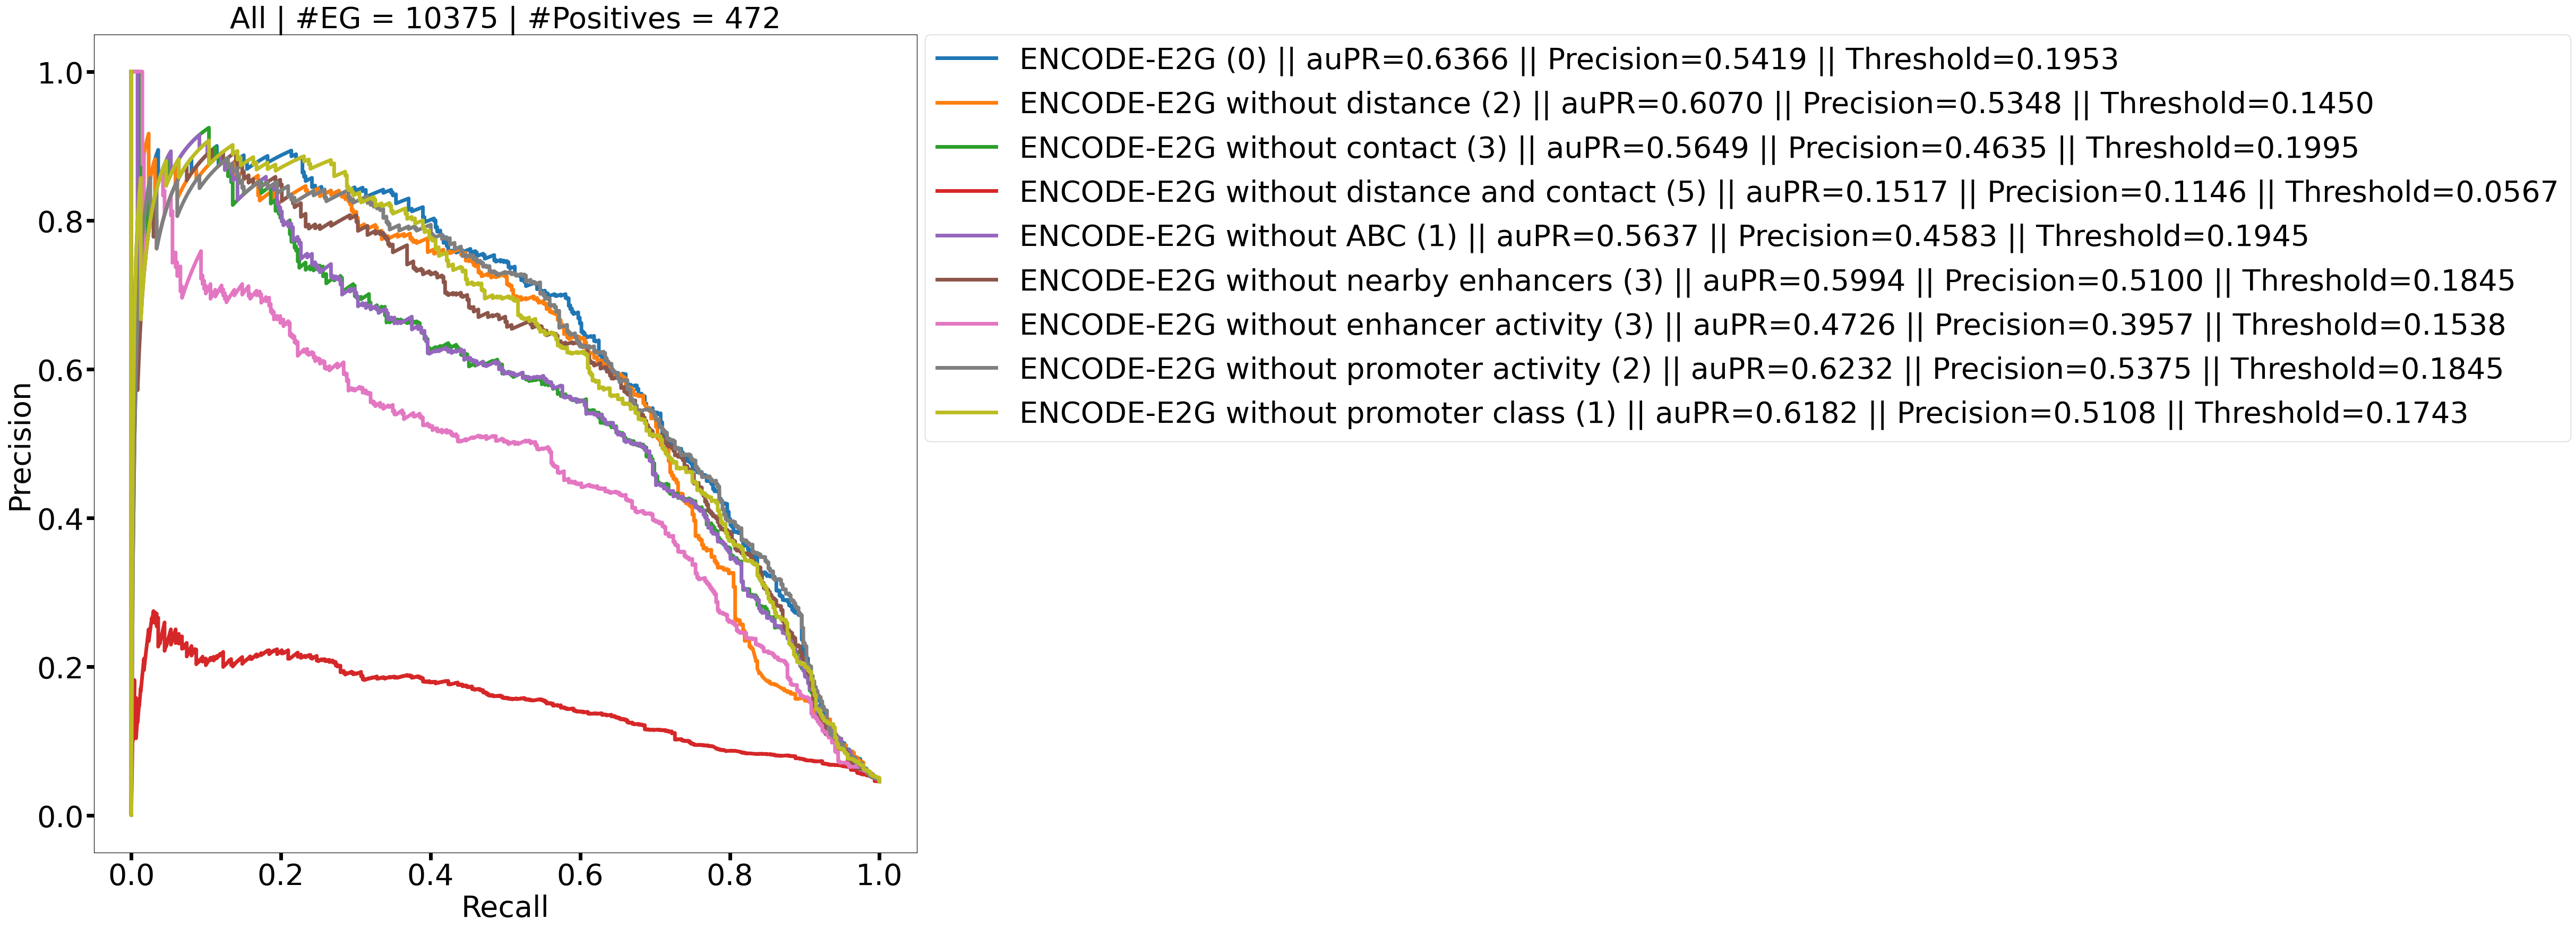

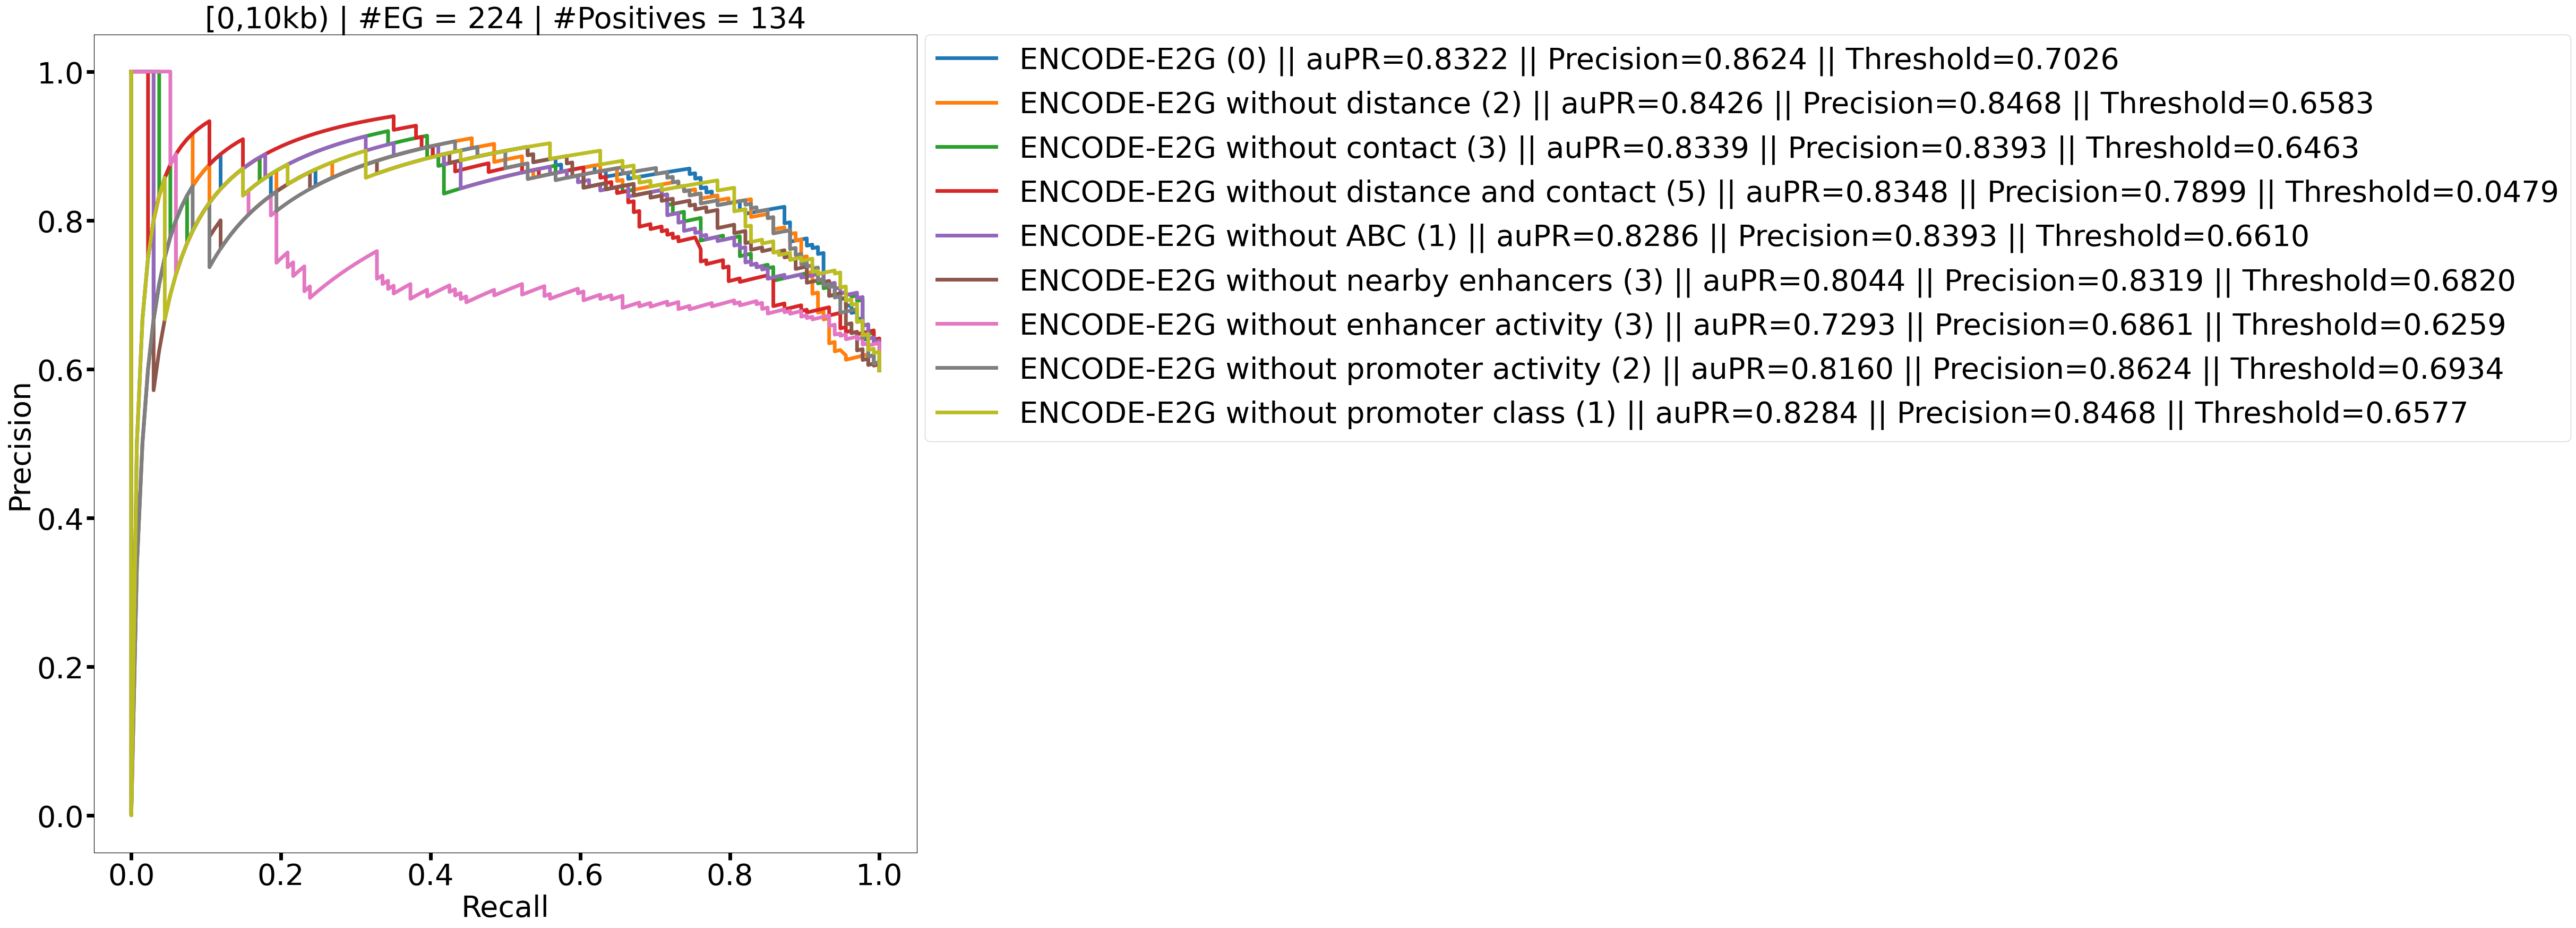

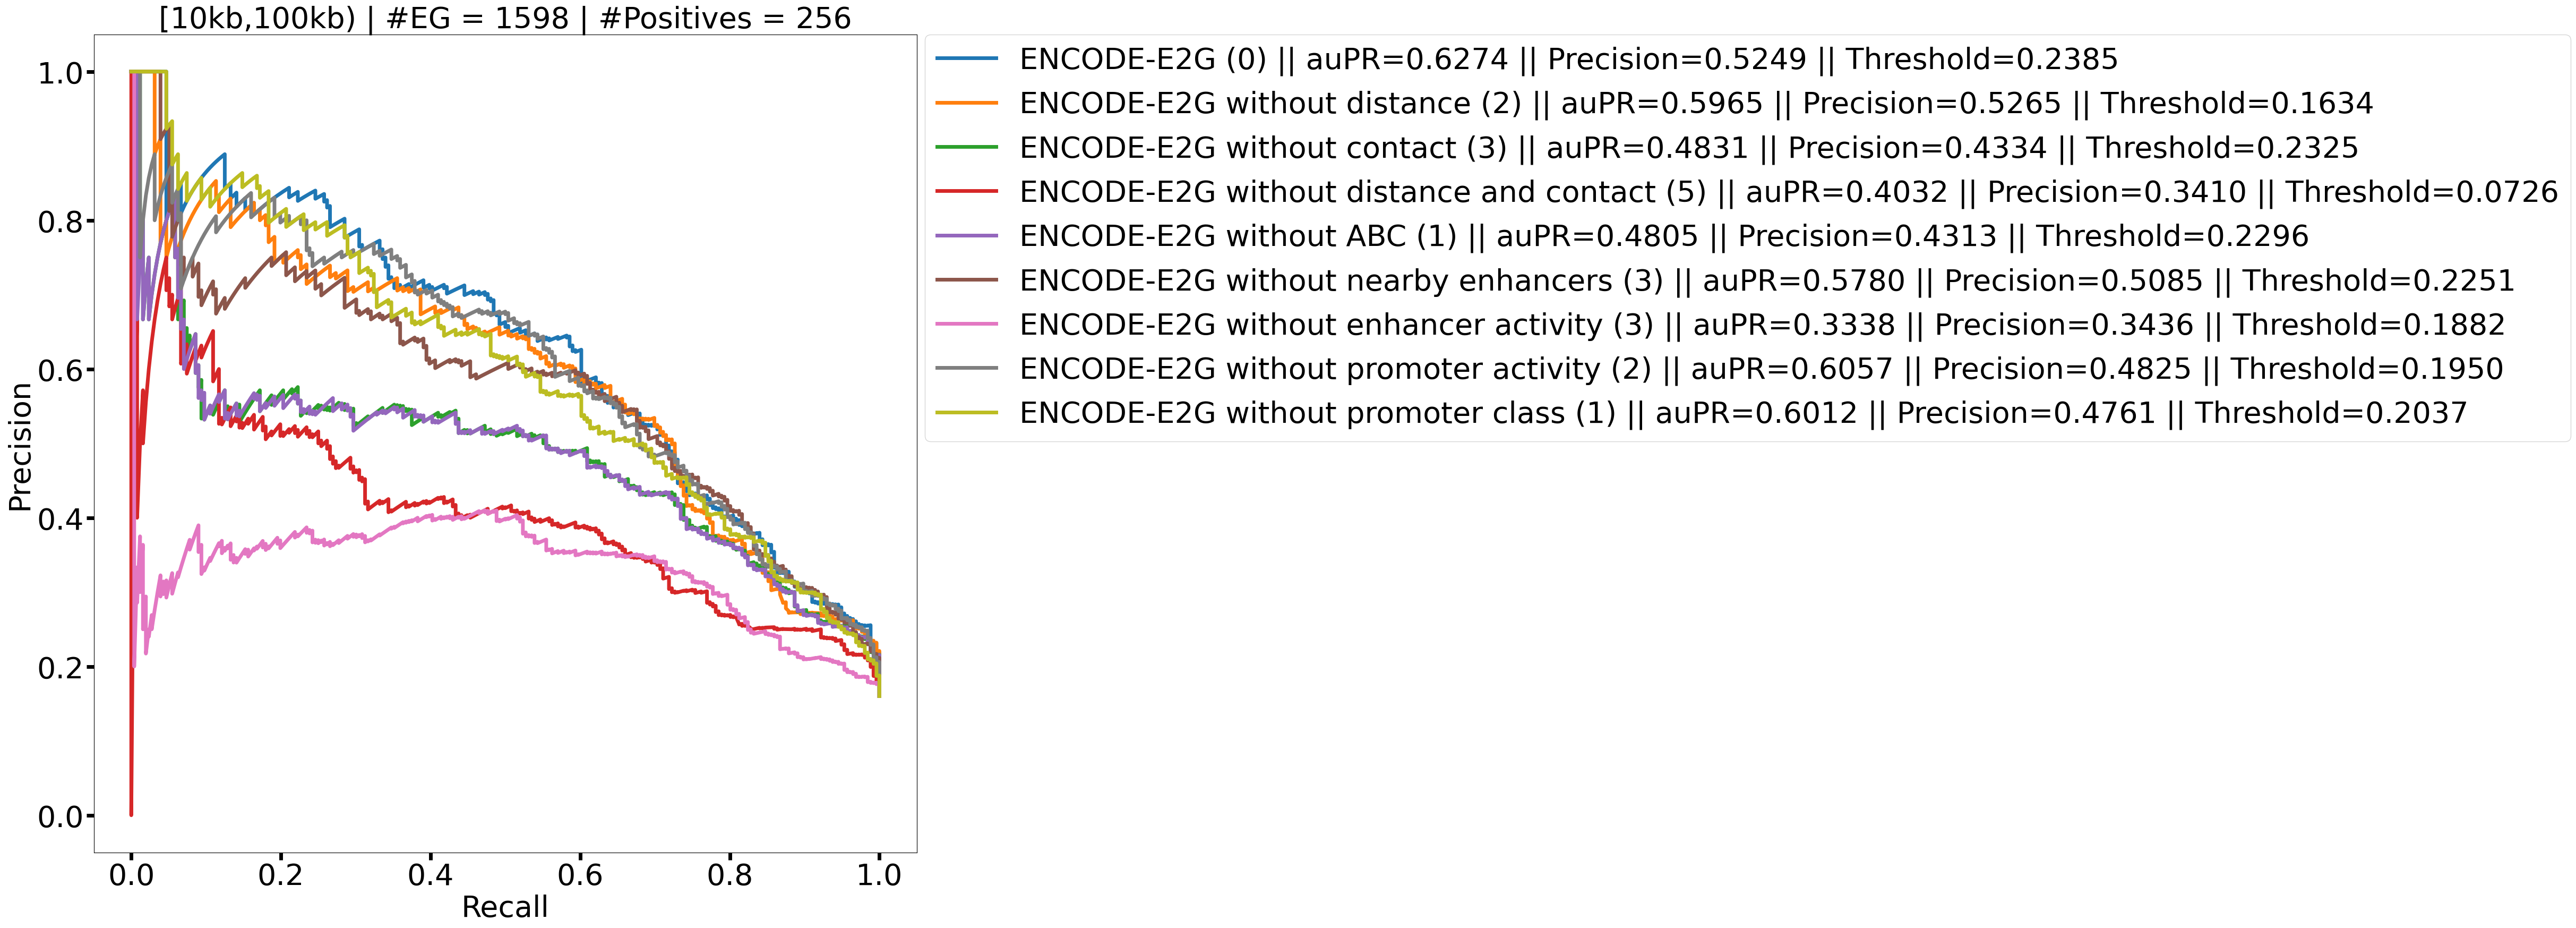

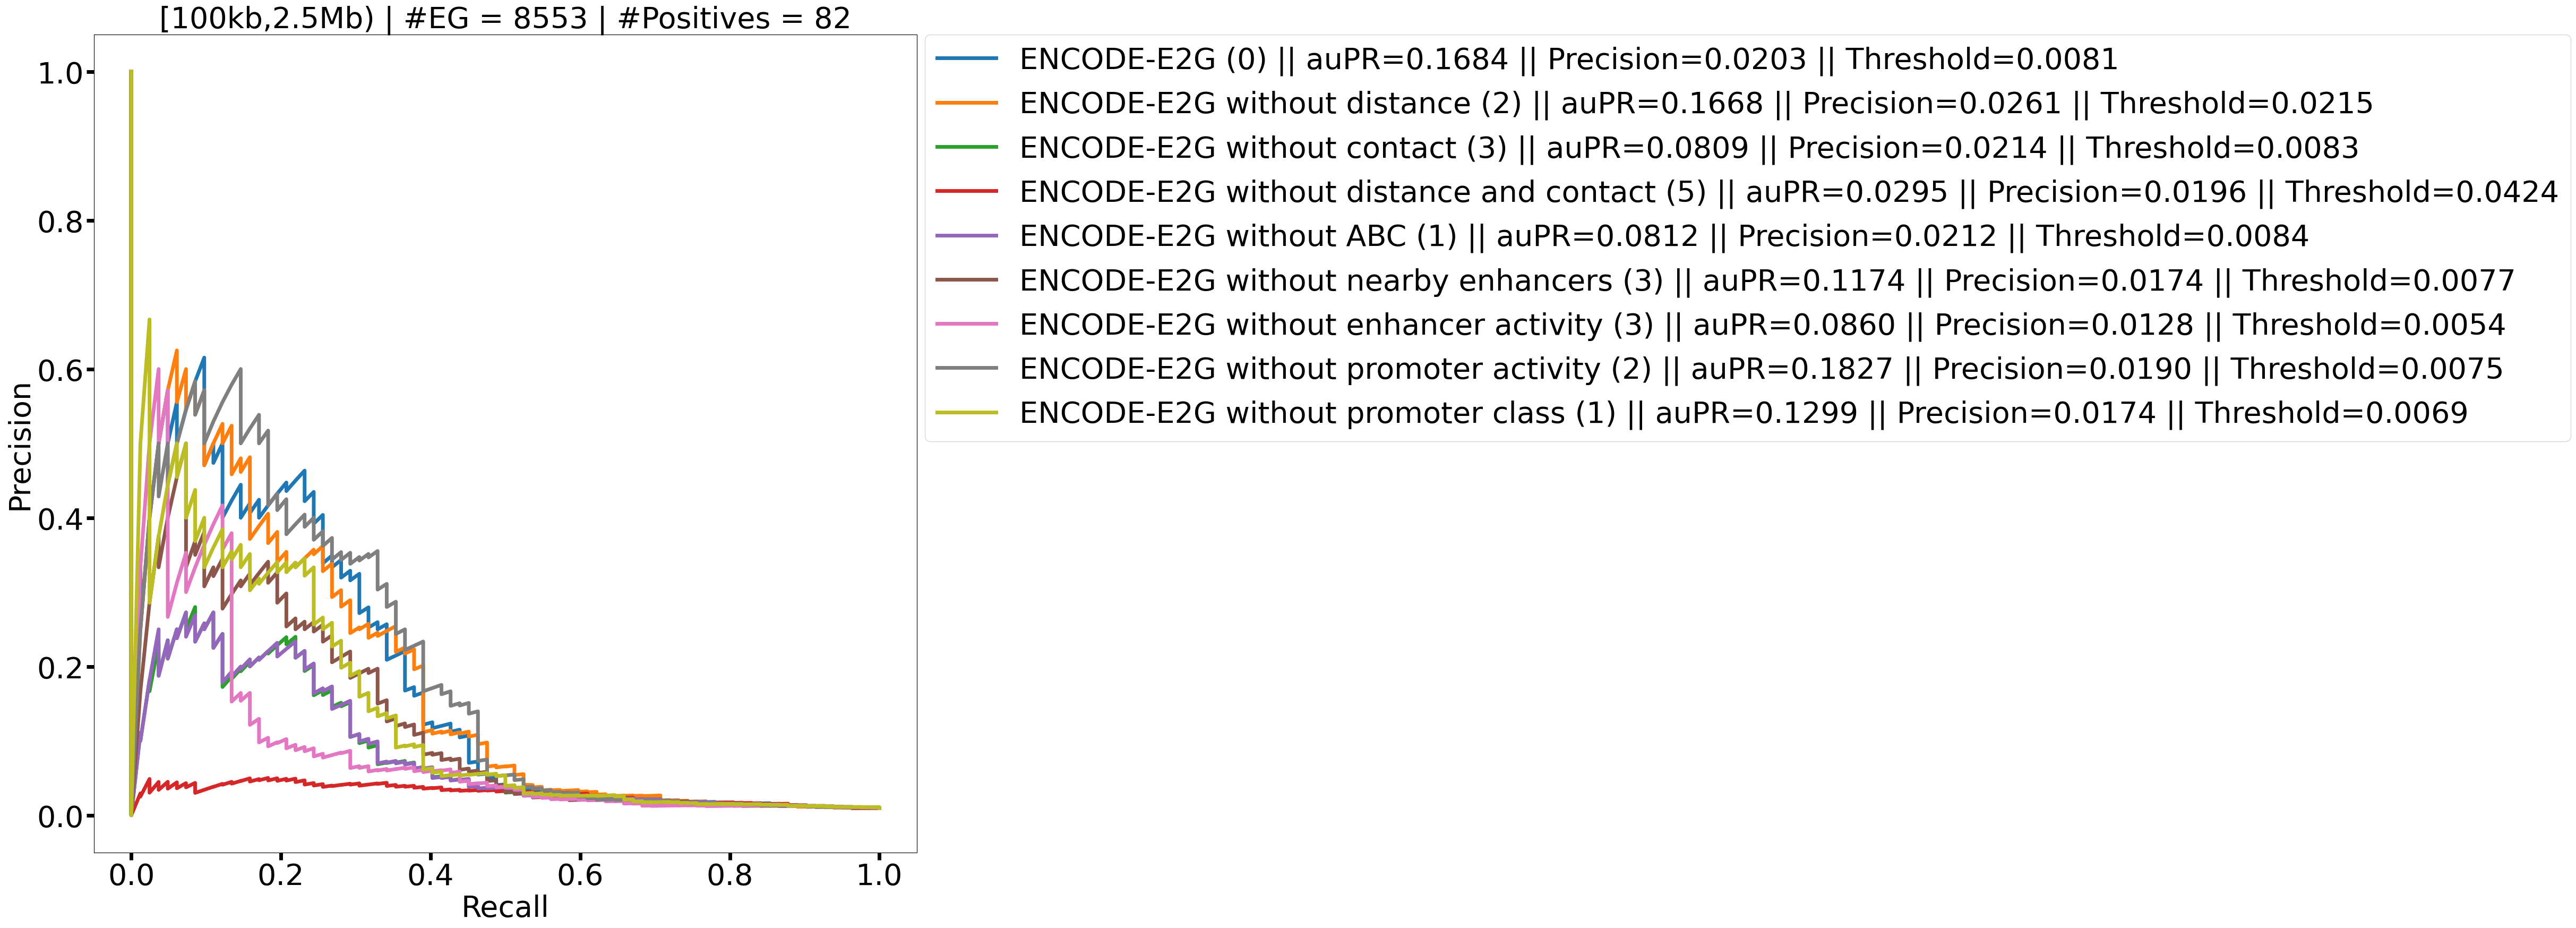

In [9]:
e2g.plot_PR_curves()

Plot 95% confidence interval of model ablations based on bootstrapping:

Distance range: All, model: ENCODE-E2G without distance
Delta auPR p-value = 0.0
Delta precision p-value = 0.828
###################################################################################
Distance range: All, model: ENCODE-E2G without contact
Delta auPR p-value = 0.0
Delta precision p-value = 0.002
###################################################################################
Distance range: All, model: ENCODE-E2G without distance and contact
Delta auPR p-value = 0.0
Delta precision p-value = 0.0
###################################################################################
Distance range: All, model: ENCODE-E2G without ABC
Delta auPR p-value = 0.0
Delta precision p-value = 0.001
###################################################################################
Distance range: All, model: ENCODE-E2G without nearby enhancers
Delta auPR p-value = 0.0
Delta precision p-value = 0.143
###################################################################################
Dis

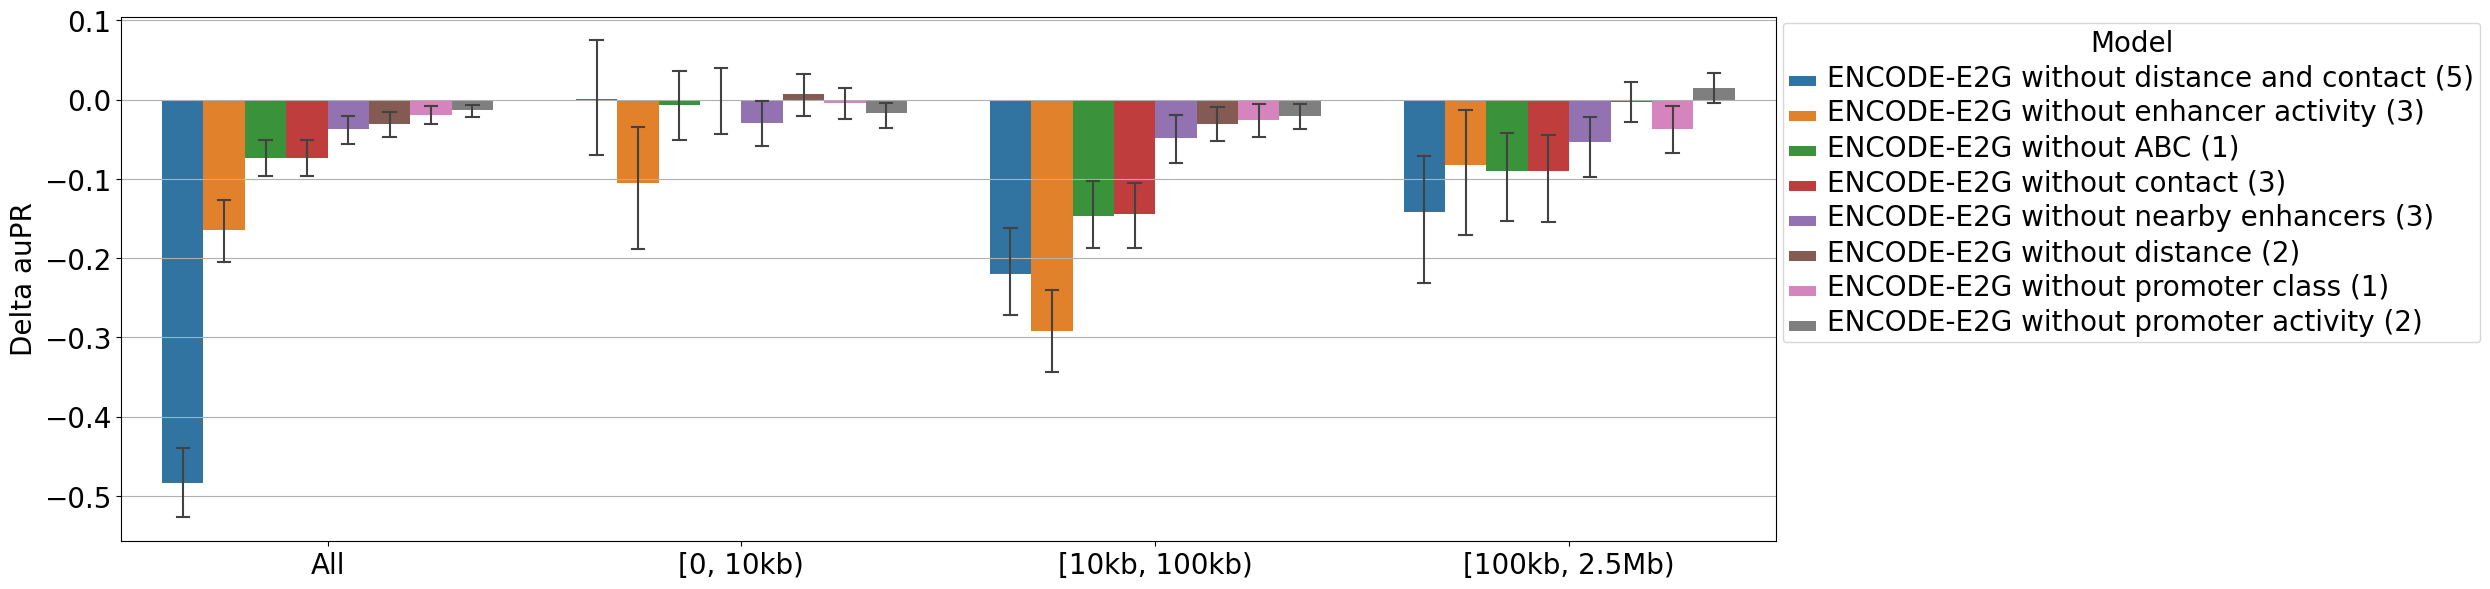

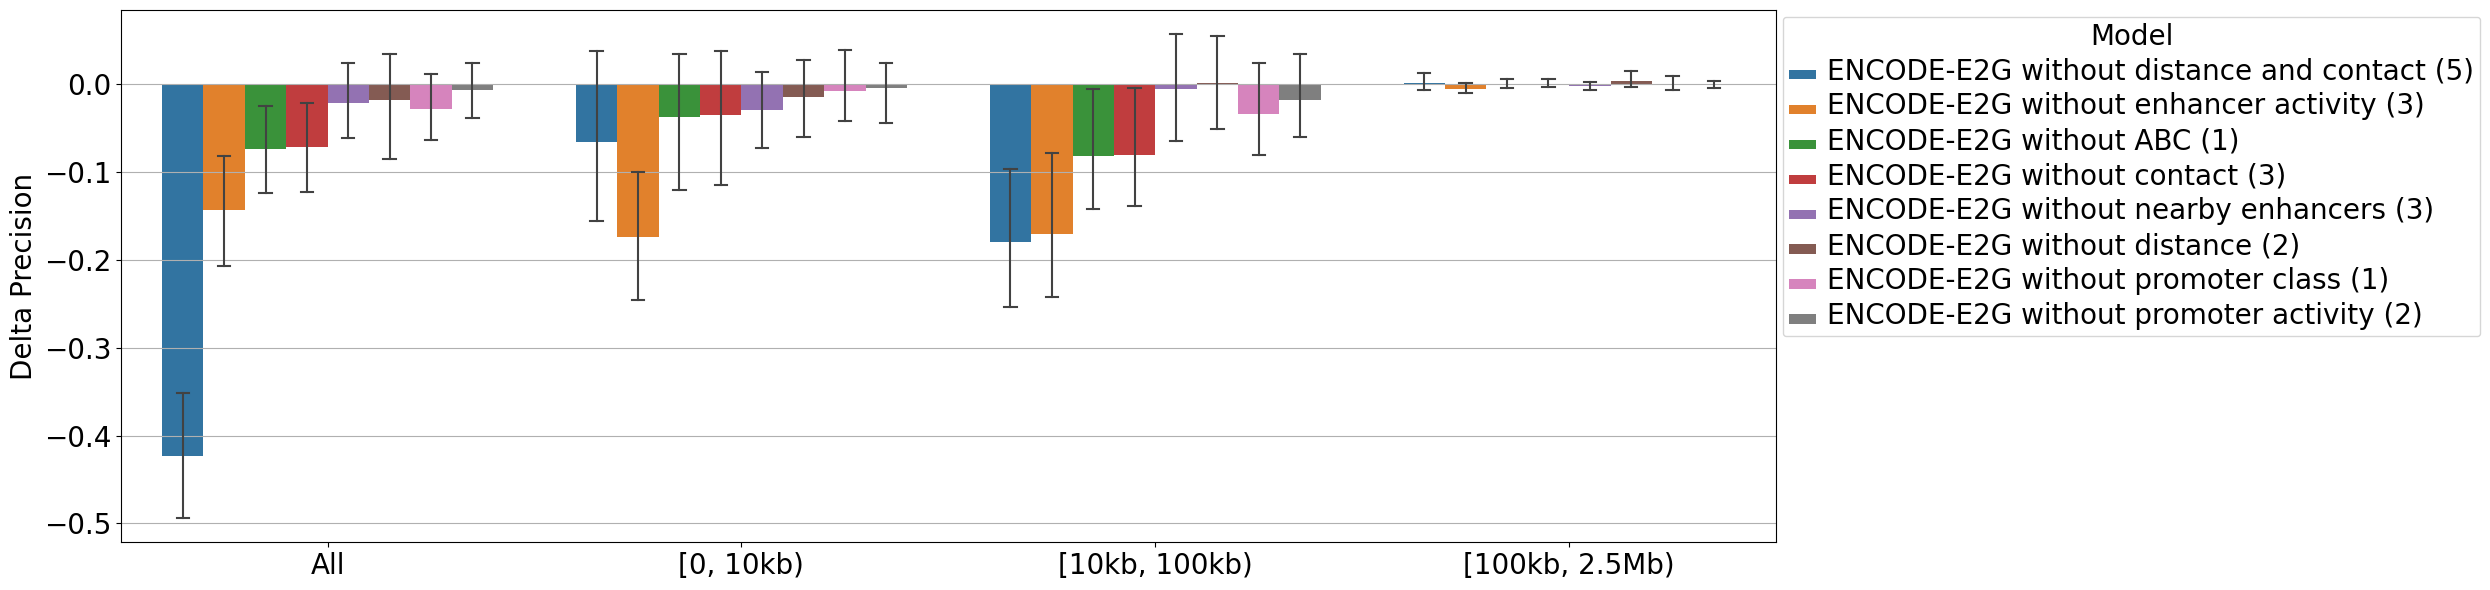

In [10]:
e2g.model_ablation_bootstrap()

Compute SHAP scores of the full models (ENCODE-E2G_Extended or ENCODE-E2G):

Model: ENCODE-E2G | Number of features: 13
Number of E-G pairs in test chromosome chr1 is 826


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/826 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr10 is 110


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/110 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr11 is 1402


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/1402 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr12 is 595


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/595 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr13 is 11


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/11 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr14 is 139


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/139 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr15 is 60


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/60 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr16 is 172


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/172 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr17 is 323


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/323 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr18 is 69


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/69 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr19 is 2260


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/2260 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr2 is 307


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/307 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr20 is 119


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/119 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr21 is 45


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/45 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr22 is 99


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/99 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr3 is 805


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/805 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr4 is 109


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/109 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr5 is 255


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/255 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr6 is 516


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/516 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr7 is 299


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/299 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr8 is 793


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/793 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chr9 is 96


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/96 [00:00<?, ?it/s]

Number of E-G pairs in test chromosome chrX is 965


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


  0%|          | 0/965 [00:00<?, ?it/s]

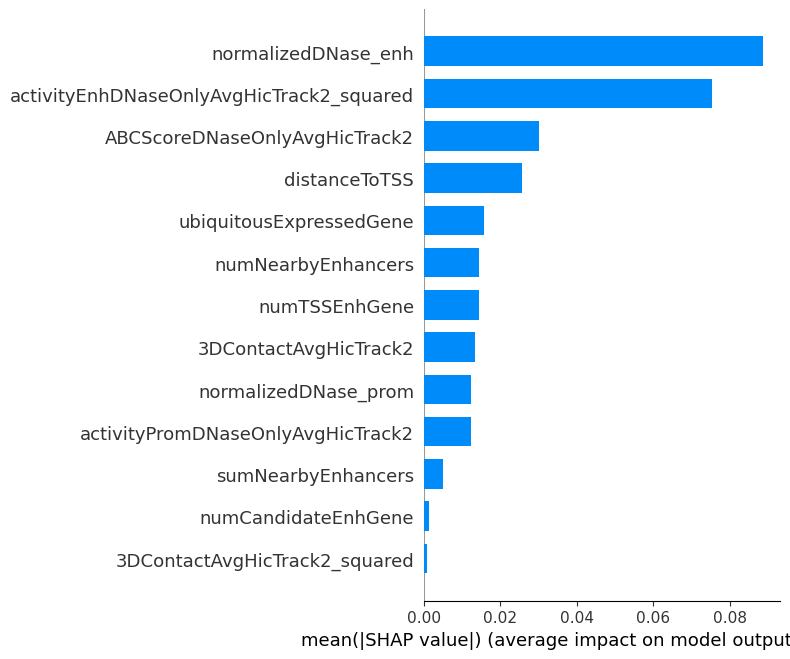

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


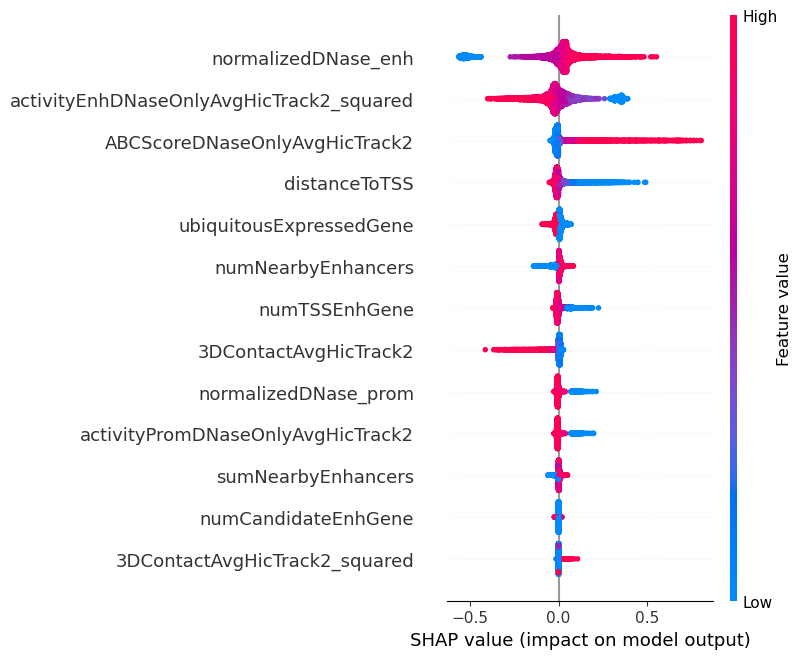

In [11]:
e2g.compute_shap()

Genomewide E-G predictions:

In [12]:
e2g.predict_genomewide()

Model name: ENCODE-E2G | Number of features: 13
File number = 1 | filepath = ./data/genomewide_predictions/encode_e2g/ENCODE-E2G_K562_ENCDO000AAD_ENCFF325RTP.tsv.gz
